In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading file

In [4]:
with open("nba_2013.csv", 'r') as csvfile: nba = pandas.read_csv(csvfile)

In [5]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [9]:
print('NBA Data - rows:' , nba.shape[0],'columns:', nba.shape[1])

NBA Data - rows: 481 columns: 31


In [6]:
nba.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

# Check % of null values in df

In [10]:
total = nba.isnull().sum().sort_values(ascending = False)
percent = (nba.isnull().sum()/nba.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,x3p.,ft.,x2p.,fg.,efg.,x2p,pos,age,bref_team_id,g,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,player
Total,67.000000,20.000000,3.000000,2.0000,2.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,13.929314,4.158004,0.623701,0.4158,0.4158,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Observations : 
    - column with highest missing values has a 13.9% values missing ie x3p column

# Missing Values

In [11]:
missingInfo = list(nba.columns[nba.isnull().any()])
missingInfo

['fg.', 'x3p.', 'x2p.', 'efg.', 'ft.']

In [14]:
for col in missingInfo:
    missingNumber = nba[nba[col].isnull() == True].shape[0]
    print('Missing Number for Col {}: {}'.format(col , missingNumber))
else :
    print(f'Data is not clean , data has missing values in columns')

Missing Number for Col fg.: 2
Missing Number for Col x3p.: 67
Missing Number for Col x2p.: 3
Missing Number for Col efg.: 2
Missing Number for Col ft.: 20
Data is not clean , data has missing values in columns


In [16]:
nba.mean()

age             26.509356
g               53.253638
gs              25.571726
mp            1237.386694
fg             192.881497
fga            424.463617
fg.              0.436436
x3p             39.613306
x3pa           110.130977
x3p.             0.285111
x2p            153.268191
x2pa           314.332640
x2p.             0.466947
efg.             0.480752
ft              91.205821
fta            120.642412
ft.              0.722419
orb             55.810811
drb            162.817048
trb            218.627859
ast            112.536383
stl             39.280665
blk             24.103950
tov             71.862786
pf             105.869023
pts            516.582121
season_end    2013.000000
dtype: float64

# Observation :

In [ ]:
- The Mean for Field Goals for the season was 192 goals

# Get the mean of specific columns - Field Goals

In [20]:
nba.loc[:, 'fg'].mean().round(3)

192.881

# Pairwise scatter plot - Comparing Assists , Field Goals , Total Rebounds

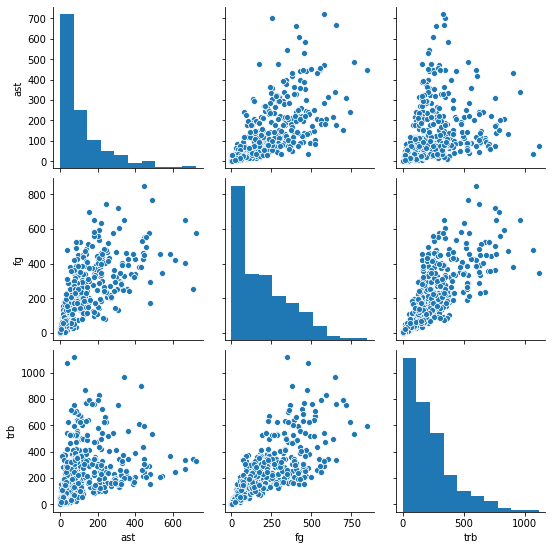

In [18]:
sns.pairplot(nba[['ast','fg','trb']])

# HeatMap to see correlations of Assist , field goals and total rebounds

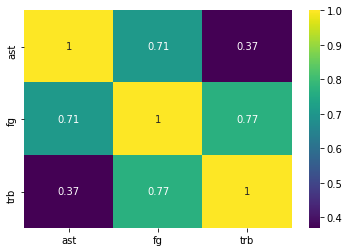

In [22]:
correlations = nba[['ast','fg','trb']].corr()
sns.heatmap(correlations , annot = True , cmap='viridis')

# Categorical Columns

In [56]:
cat_cols = list(set(nba.columns) - set(nba._get_numeric_data().columns))
cat_cols

['player', 'pos', 'season', 'bref_team_id']

# Numerical Columns

In [57]:
num_cols = list(nba._get_numeric_data().columns)
num_cols

['age',
 'g',
 'gs',
 'mp',
 'fg',
 'fga',
 'fg.',
 'x3p',
 'x3pa',
 'x3p.',
 'x2p',
 'x2pa',
 'x2p.',
 'efg.',
 'ft',
 'fta',
 'ft.',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'pts',
 'season_end']

# Heatmap

In [58]:
target = 'pts'

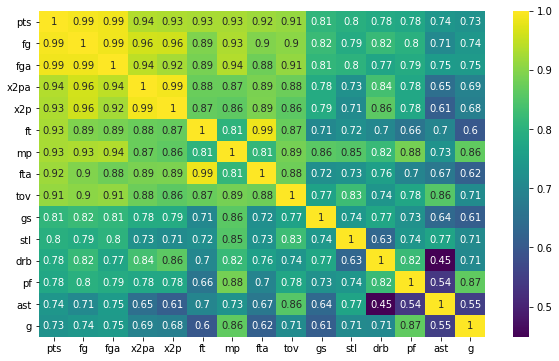

In [60]:
k = 15
cols = nba[num_cols].corr().nlargest(k , target)[target].index
cm = nba[cols].corr()
plt.figure(figsize = (10,6))
sns.heatmap(cm , annot=True , cmap='viridis')
plt.show()

In [27]:
from matplotlib import pyplot as plt
from math import ceil

In [ ]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(nba.shape[1]) / cols)
for i , column in enumerate(nba.columns):
    axs = fig.add_subplot(rows, cols , i + 1)
    axs.set_title(column)
    nba.plot(kind = 'scatter' , x=column , y = 'pts' , ax=axs)
    plt.xticks(rotation = 'vertical')
plt.subplots_adjust(hspace=0.7 , wspace=0.2)    

In [ ]:
# correlations = nba[['ast','fg','trb']].corr()
# sns.heatmap(nba , annot = True , cmap='viridis')

In [63]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train . x_test , y_train , y_test = train_test_split()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier() # creating KMeans model with 5 clusters
good_columns = nba._get_numeric_data().dropna(axis=1) # creating KMeans model with 5 clusters
knn.fit(good_columns)  # Get labels or clustor (cluster label for each label)
labels = knn.labels_ # Train the model
labels

TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
# Plotting Players by cluster with PCA

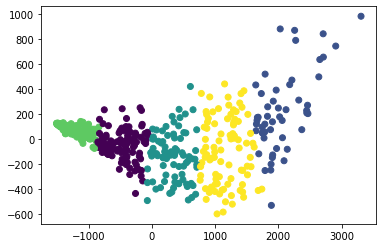

In [26]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0] , y = plot_columns[:,1] , c=labels)
plt.show()

In [ ]:
# Getting Data for individual players - Lebron James and Kevin Durant

In [29]:
Lebron = good_columns.loc[nba['player'] == 'LeBron James' , :]
Lebron

Durant = good_columns.loc[nba['player'] == 'Kevin Durant' , :]

print(Lebron)

print("------------------------------------------")

print(Durant)

     age   g  gs    mp   fg   fga  x3p  x3pa  x2p  x2pa  ...  orb  drb  trb  \
225   29  77  77  2902  767  1353  116   306  651  1047  ...   81  452  533   

     ast  stl  blk  tov   pf   pts  season_end  
225  488  121   26  270  126  2089        2013  

[1 rows x 22 columns]
------------------------------------------
     age   g  gs    mp   fg   fga  x3p  x3pa  x2p  x2pa  ...  orb  drb  trb  \
133   25  81  81  3122  849  1688  192   491  657  1197  ...   58  540  598   

     ast  stl  blk  tov   pf   pts  season_end  
133  445  103   59  285  174  2593        2013  

[1 rows x 22 columns]
